## Denoising using code found here : https://www.kaggle.com/theoviel/denoising-with-direct-wavelet-transform

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime, timedelta
import pywt
import matrixprofile as mp
from matrixprofile.preprocess import preprocess

In [105]:
Sample_rate = '5T'

df = pd.read_csv (r'C:\Users\conal\Desktop\MCM\Practicum\data\min,max,average gas 11-26 to 01-26 QUERY 2.csv', header=0)
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'], format = '%Y-%m-%d %H:%M:%S UTC')
df = df.sort_values(by='block_timestamp',ascending=False)
df['min_gas_price'] = df['min_gas_price'].apply(lambda x: x/1000000000)
df['avg_gas_price'] = df['avg_gas_price'].apply(lambda x: x/1000000000)
df['max_gas_price'] = df['max_gas_price'].apply(lambda x: x/1000000000)
df = df.set_index('block_timestamp')
df = df.squeeze()
df = df.astype('float')
df = df.resample(Sample_rate).mean()
df['block_timestamp'] = df.index
df.head()

avg_gas_price  max_gas_price  min_gas_price  \
block_timestamp                                                    
2021-11-26 00:00:00      97.116698     387.258565      83.061897   
2021-11-26 00:05:00     109.238940    1392.976500      95.283713   
2021-11-26 00:10:00     103.359952     512.782412      91.935674   
2021-11-26 00:15:00     104.216456     371.040167      90.375757   
2021-11-26 00:20:00     112.696873     366.088800     101.004660   

                        block_timestamp  
block_timestamp                          
2021-11-26 00:00:00 2021-11-26 00:00:00  
2021-11-26 00:05:00 2021-11-26 00:05:00  
2021-11-26 00:10:00 2021-11-26 00:10:00  
2021-11-26 00:15:00 2021-11-26 00:15:00  
2021-11-26 00:20:00 2021-11-26 00:20:00

In [106]:
df_week = df.loc['2022-01-5':'2022-01-8']
df_week.head()

avg_gas_price  max_gas_price  min_gas_price  \
block_timestamp                                                    
2022-01-05 00:00:00     171.542467     593.443800     155.406600   
2022-01-05 00:05:00     198.150750     895.825938     181.859688   
2022-01-05 00:10:00     191.940588    1504.017118     172.052941   
2022-01-05 00:15:00     162.586524     633.835000     148.578619   
2022-01-05 00:20:00     141.930741     359.597778     128.708370   

                        block_timestamp  
block_timestamp                          
2022-01-05 00:00:00 2022-01-05 00:00:00  
2022-01-05 00:05:00 2022-01-05 00:05:00  
2022-01-05 00:10:00 2022-01-05 00:10:00  
2022-01-05 00:15:00 2022-01-05 00:15:00  
2022-01-05 00:20:00 2022-01-05 00:20:00

In [107]:
df_week = df.loc['2021-12-5':'2021-12-28']
np_min = df_week['min_gas_price'].to_numpy()
np_min_np = preprocess(np_min, window=5, impute_method='mean', impute_direction='fwd', add_noise=False)
df_week_min = pd.DataFrame(np_min_np, columns = ['min_gas_price'])


In [108]:

n_times = 1008
time = df_week['block_timestamp'].values
signal = df_week_min['min_gas_price'].values

time.size

6912

In [109]:


def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)



In [110]:


def wavelet_denoising(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')



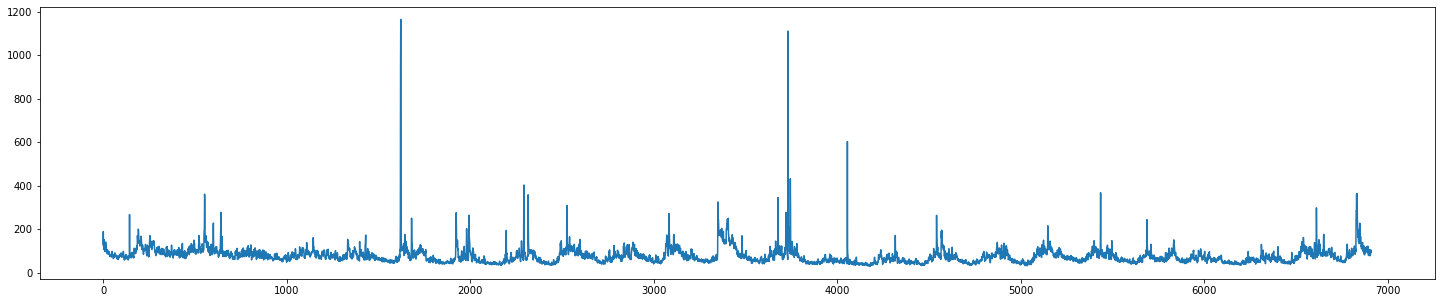

In [153]:
figure(figsize=(25,5))

x_coordinate = [ i for i in range(len(signal)) ]
fig = plt.plot(x_coordinate,signal)

plt.show()

In [112]:
wavelist = pywt.wavelist(kind='discrete')
len(wavelist)

106

In [148]:
results = []
for i in wavelist:
    results.append(wavelet_denoising(signal, wavelet=i, level=7))

In [149]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [150]:
signaltonoise(signal)

array(1.89752388)

In [151]:
SNR = []
for a in results:
    SNR.append(signaltonoise(a))

In [152]:
SNR

[array(5.56611151),
 array(4.12464671),
 array(3.4105722),
 array(3.83935461),
 array(3.32614491),
 array(3.30951872),
 array(3.23842819),
 array(1.38706375),
 array(2.71204151),
 array(2.51433041),
 array(2.47101971),
 array(2.56572964),
 array(3.66629146),
 array(3.96674236),
 array(3.42374304),
 array(3.98612055),
 array(4.22421323),
 array(3.63084055),
 array(4.57374017),
 array(3.17175876),
 array(3.24629255),
 array(3.2106185),
 array(3.22186579),
 array(3.12852818),
 array(3.01586258),
 array(3.01506273),
 array(3.01436847),
 array(3.0137445),
 array(3.01316498),
 array(3.01261132),
 array(3.0120705),
 array(3.01153382),
 array(5.56611151),
 array(4.30769372),
 array(4.37577245),
 array(4.62685286),
 array(4.44902782),
 array(4.00299256),
 array(4.21173064),
 array(5.29367989),
 array(3.92655337),
 array(4.4345363),
 array(4.41930378),
 array(5.31943203),
 array(4.58525299),
 array(4.63354851),
 array(3.41470714),
 array(3.41643403),
 array(3.34636581),
 array(3.31956253),
 arra

D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


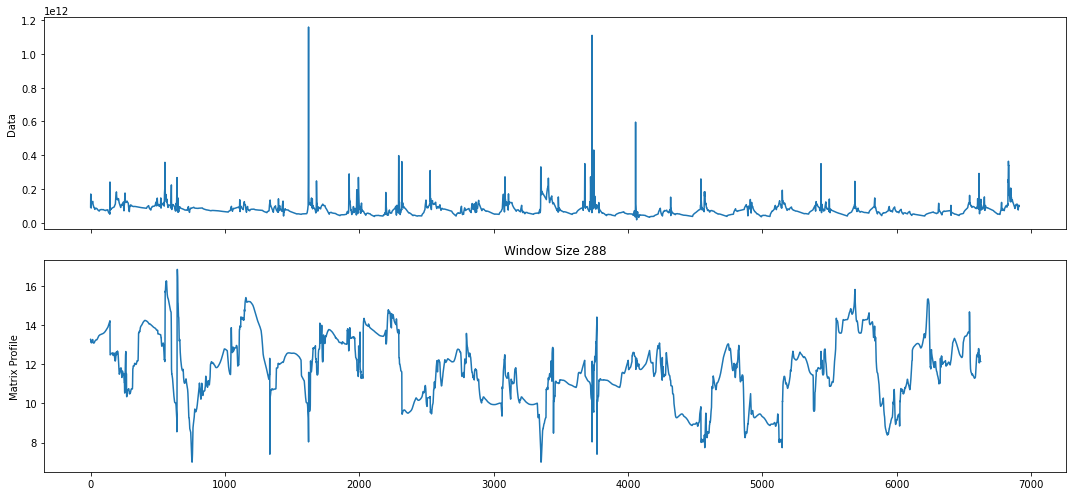

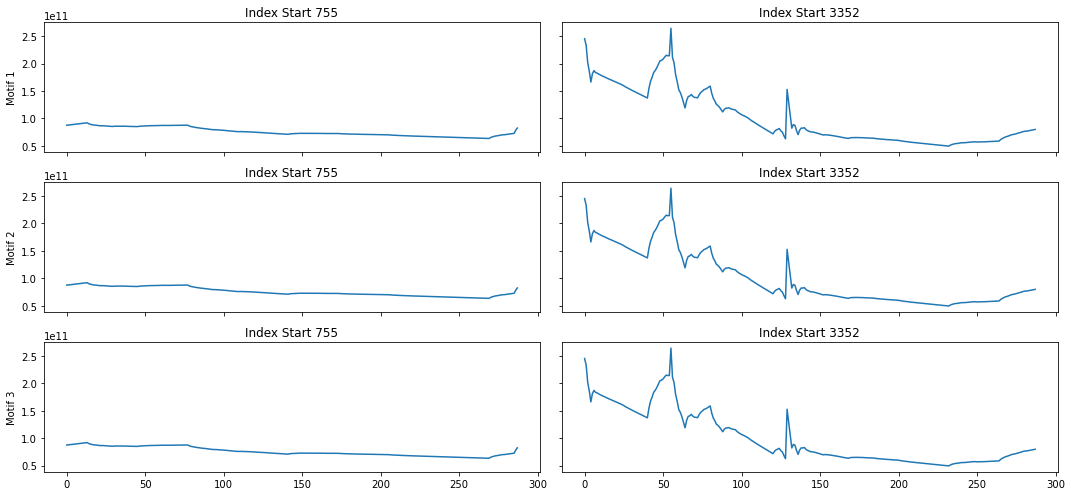

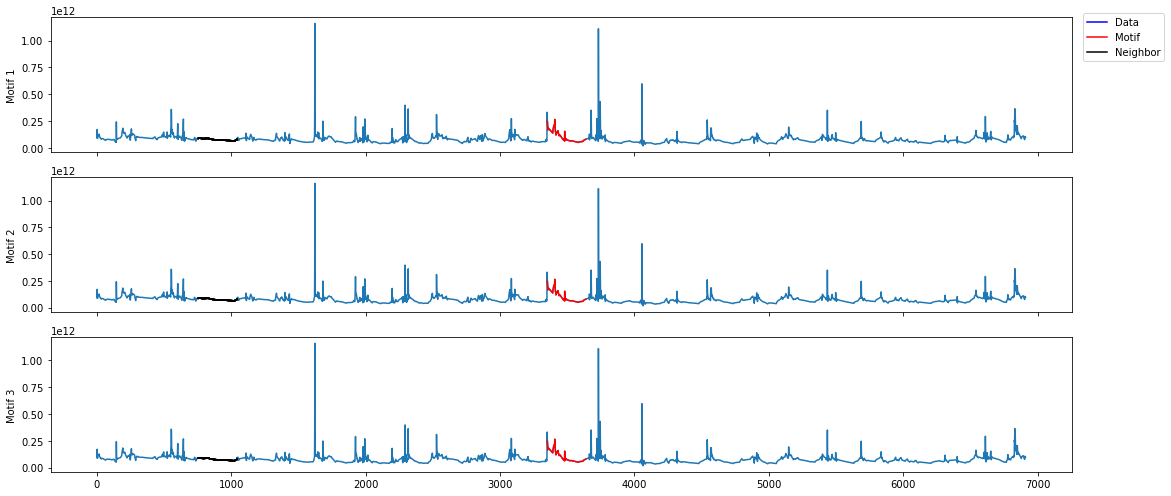

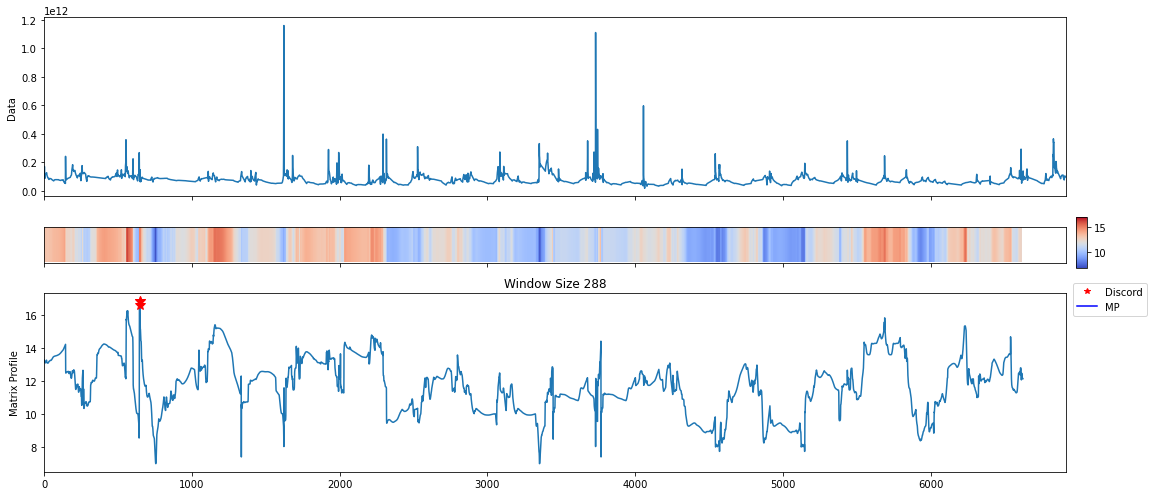

In [72]:
filtered = wavelet_denoising(signal, wavelet='sym2', level=1)
mp_profile, mp_figures = mp.analyze(filtered, windows=288, threshold=0.9)

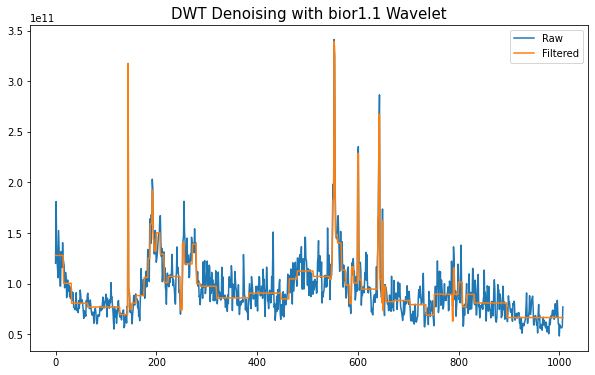

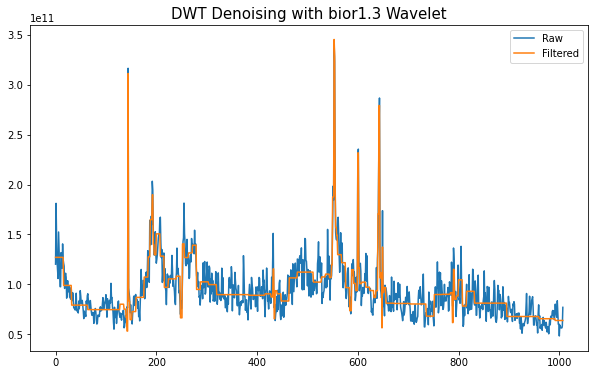

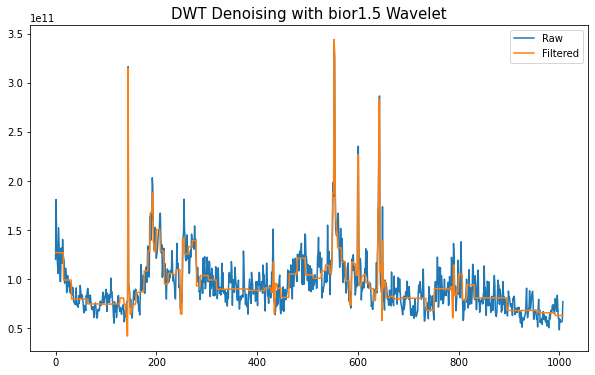

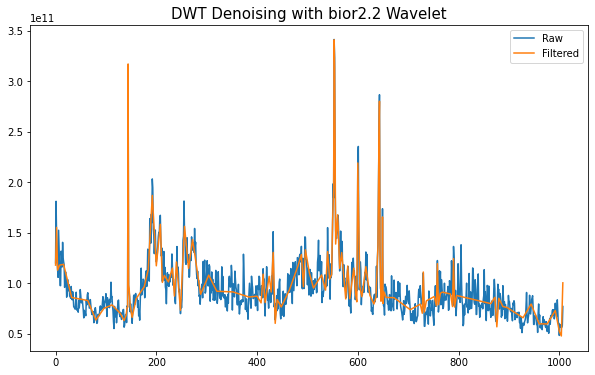

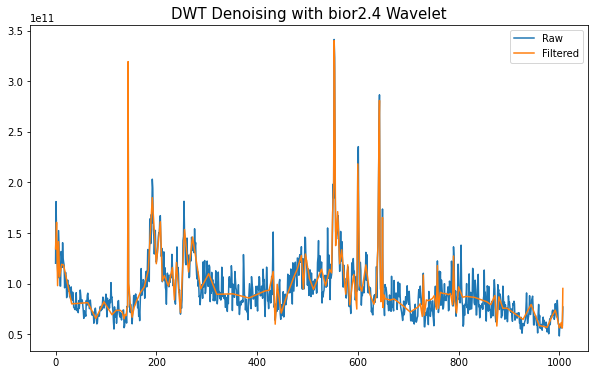

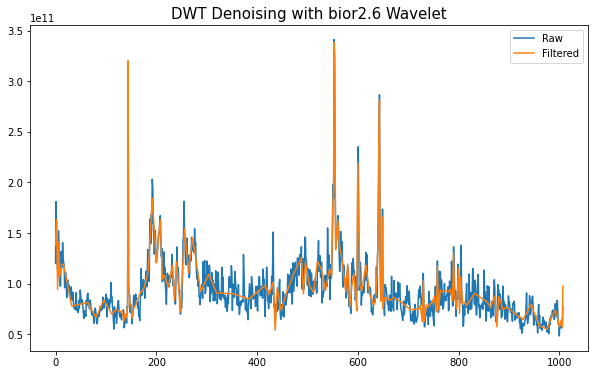

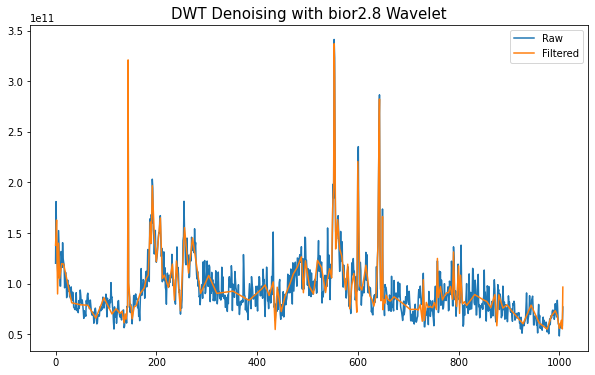

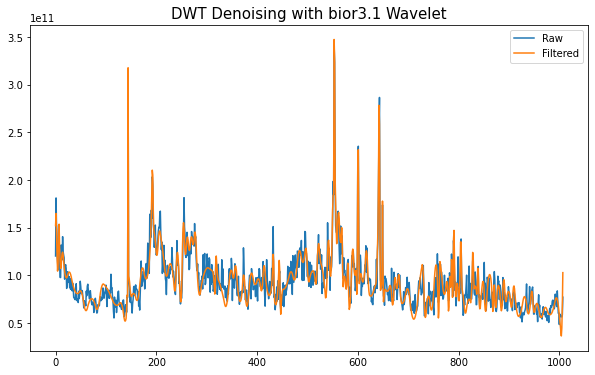

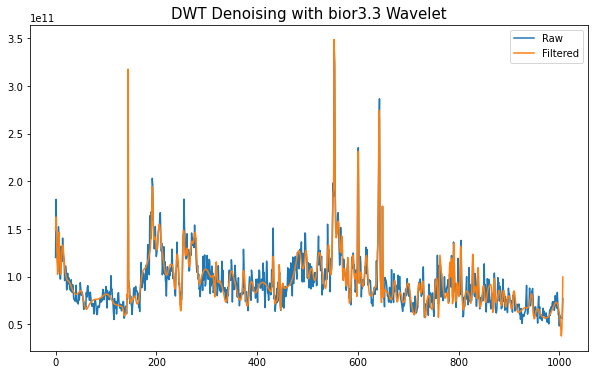

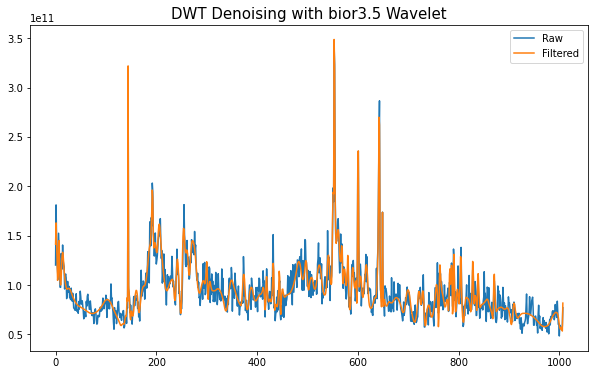

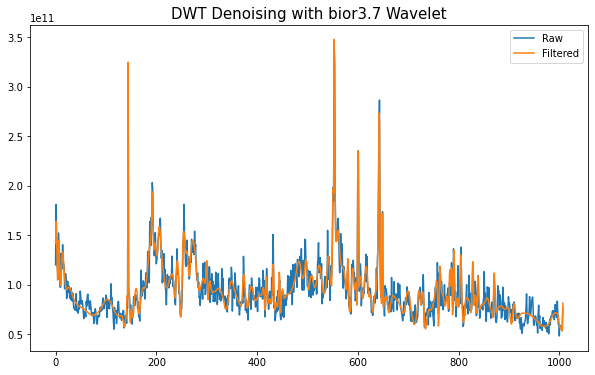

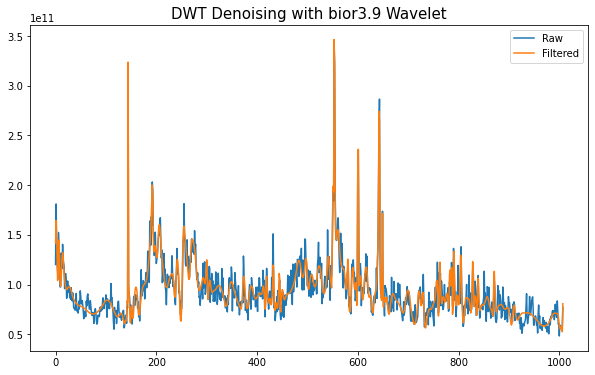

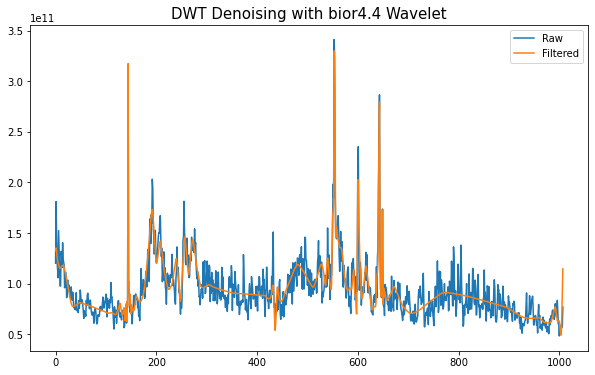

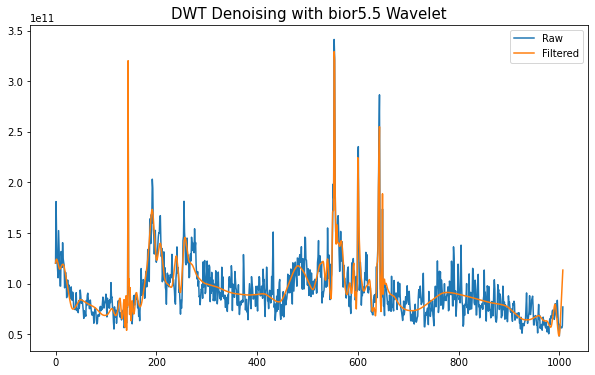

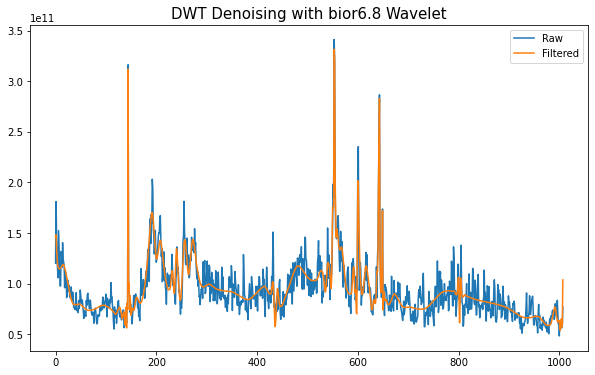

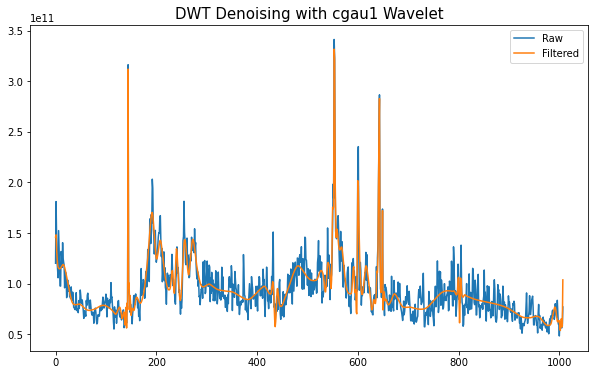

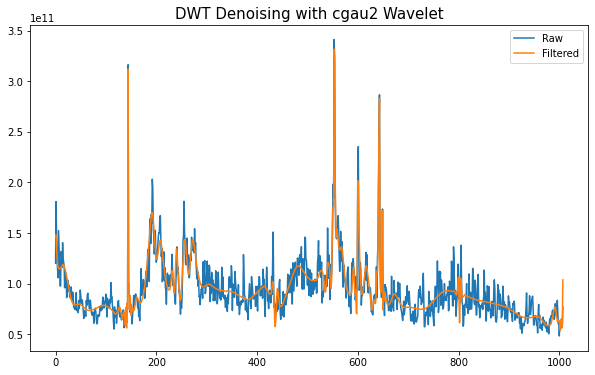

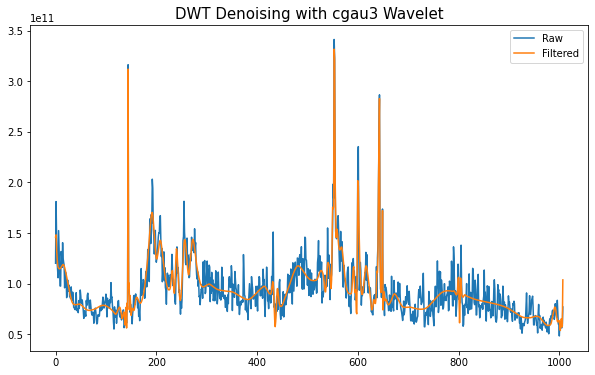

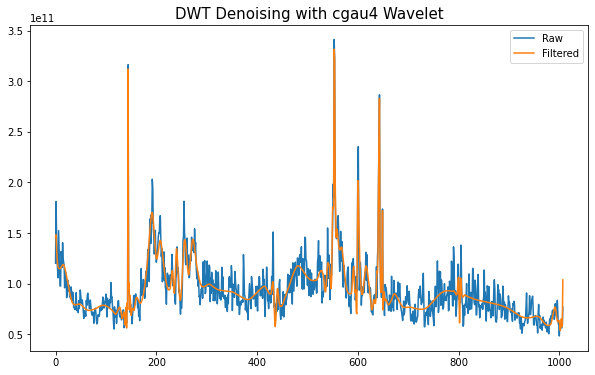

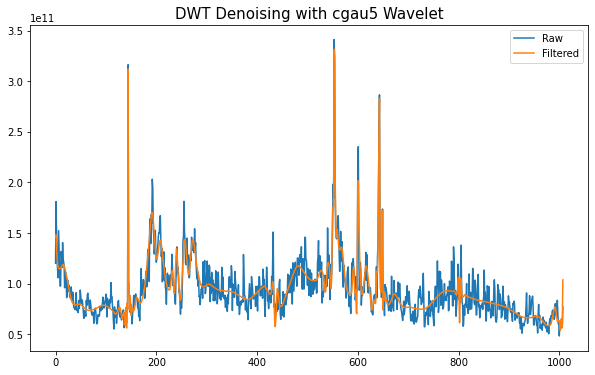

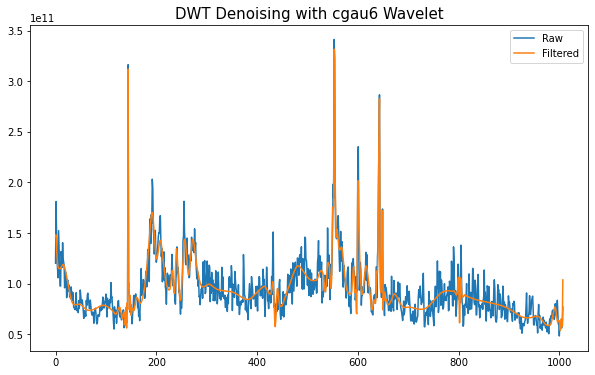

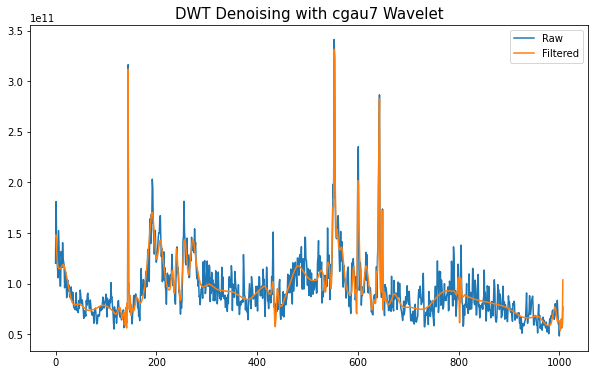

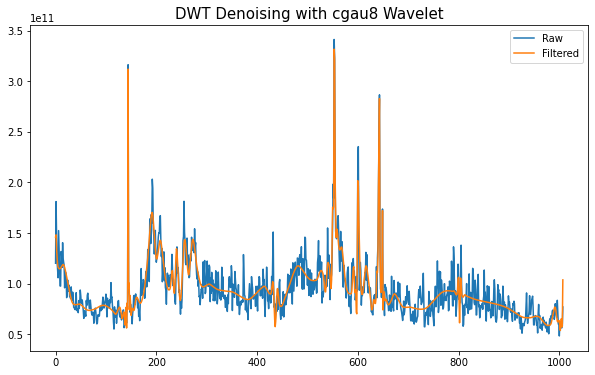

D:\Anaconda\lib\site-packages\pywt\_utils.py:23: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


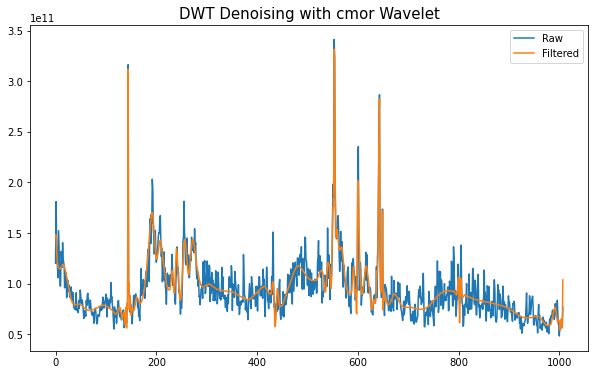

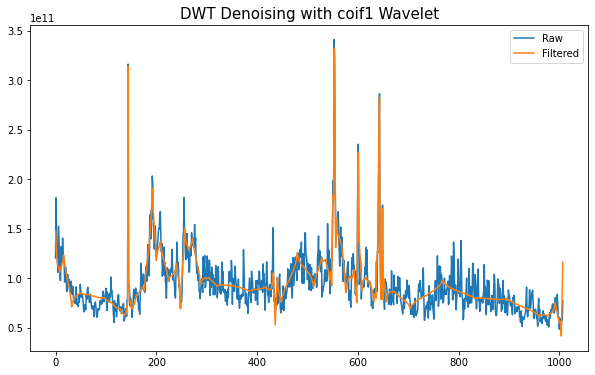

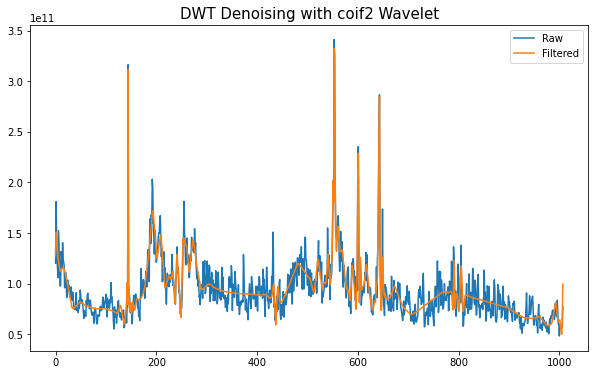

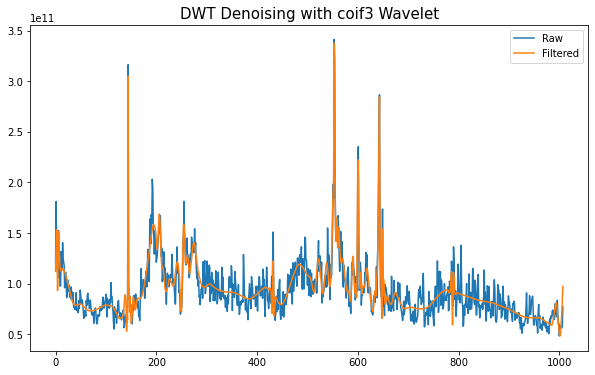

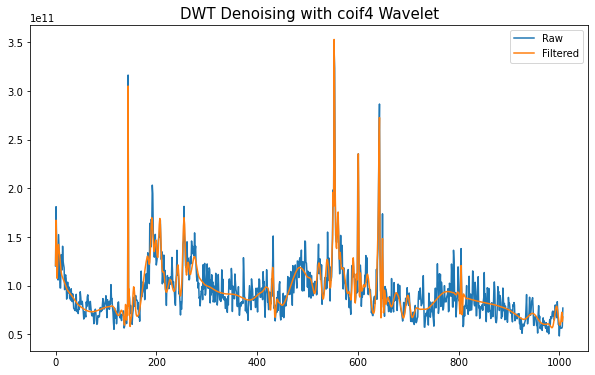

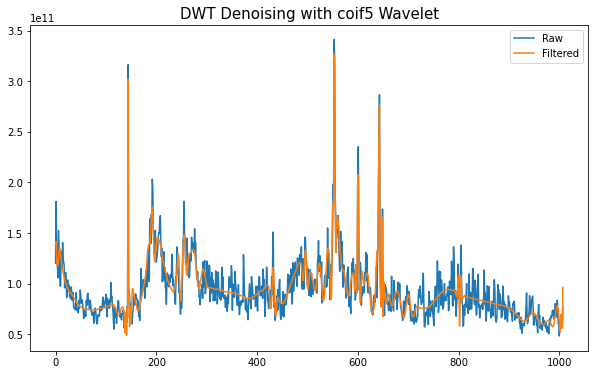

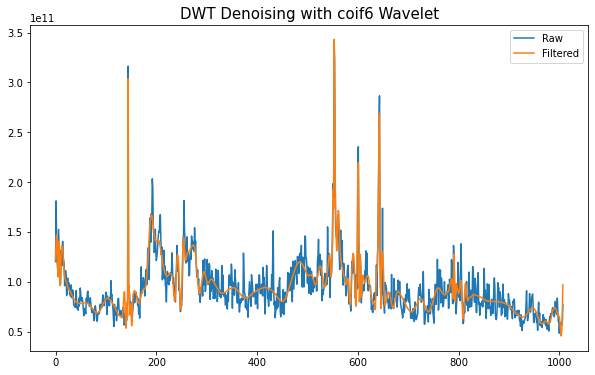

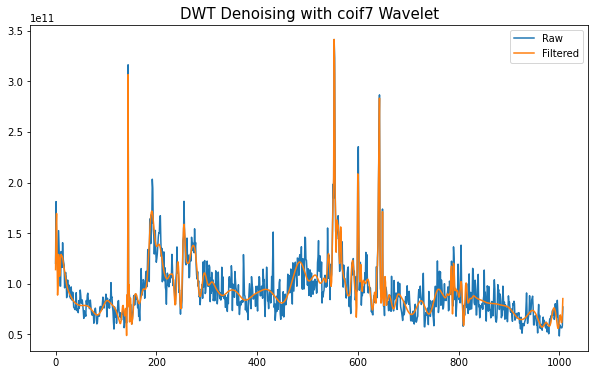

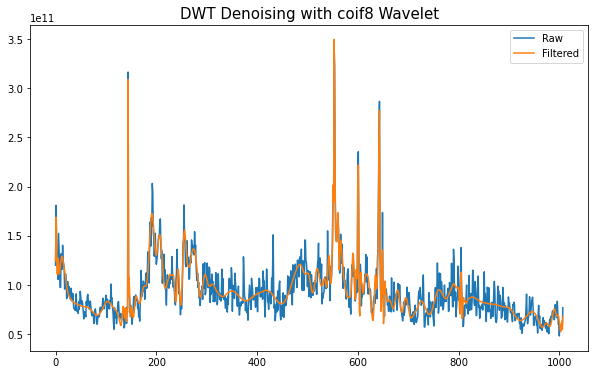

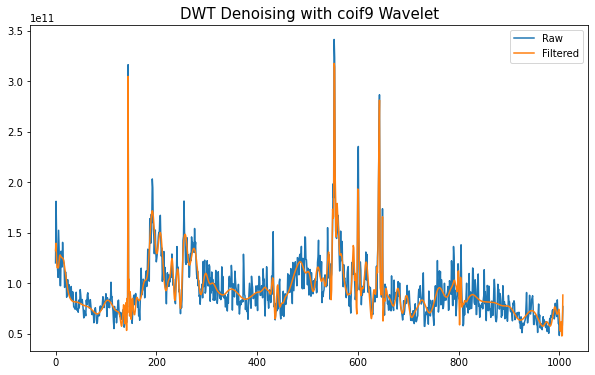

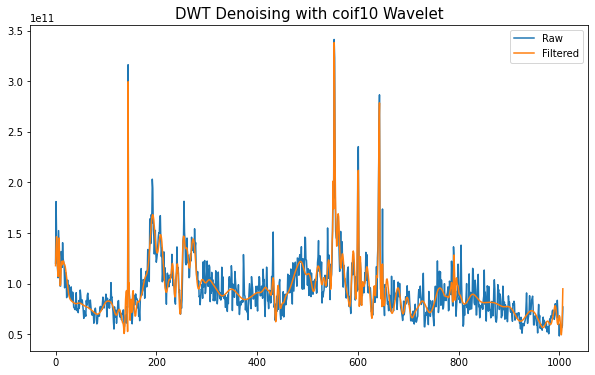

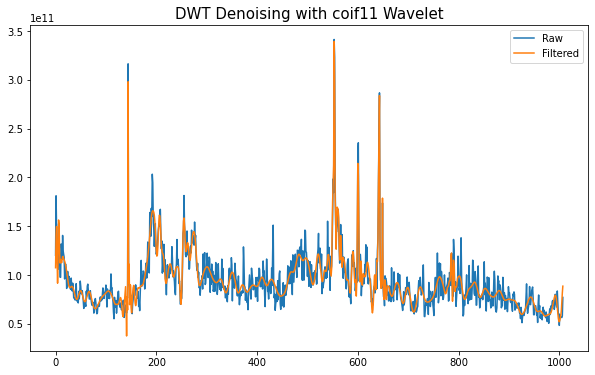

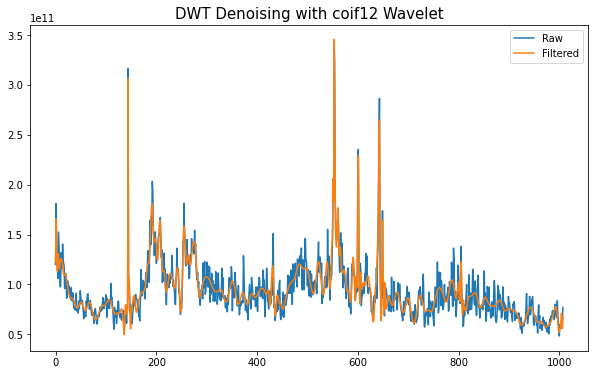

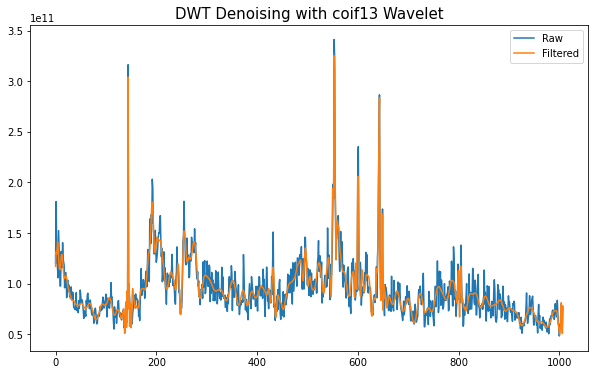

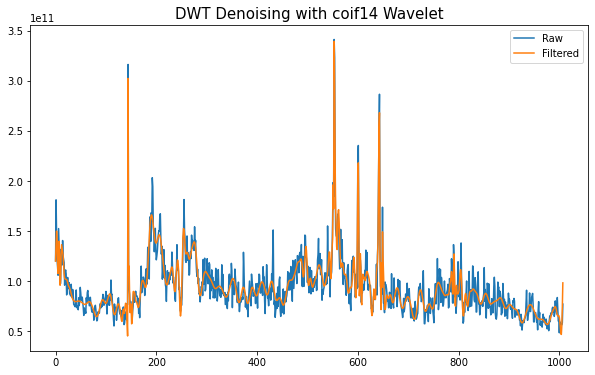

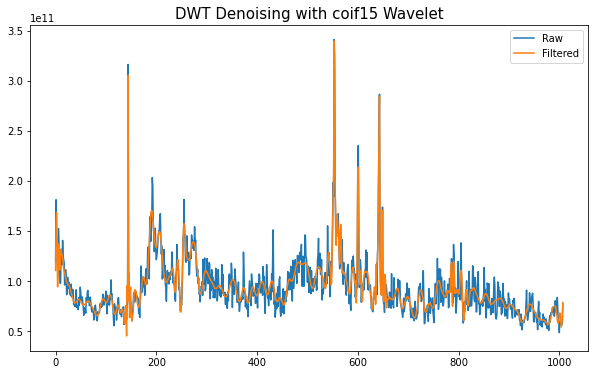

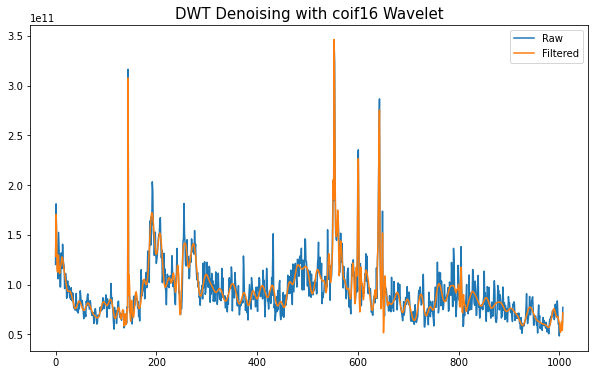

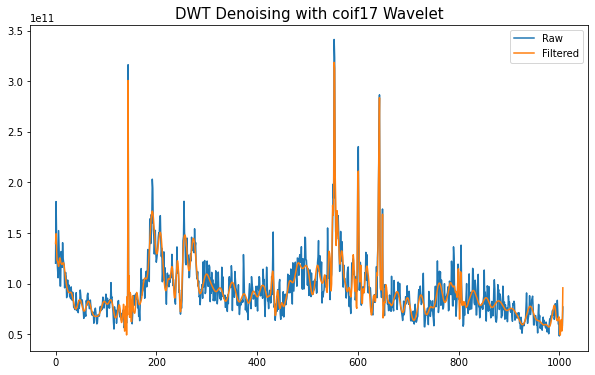

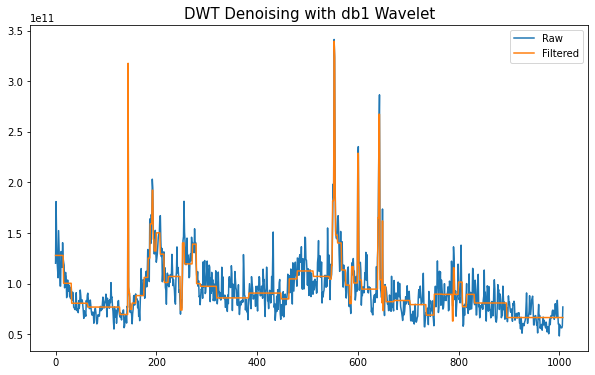

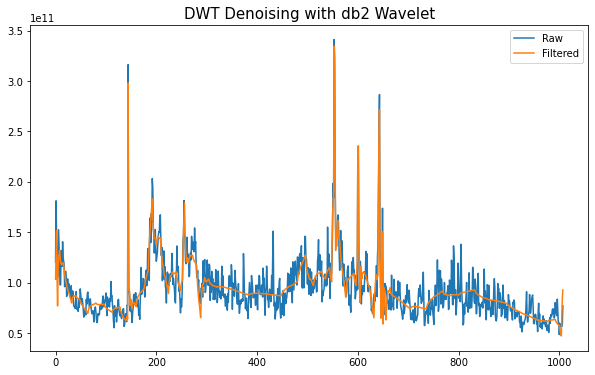

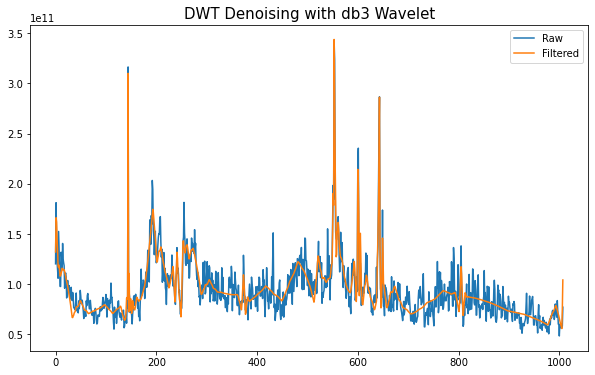

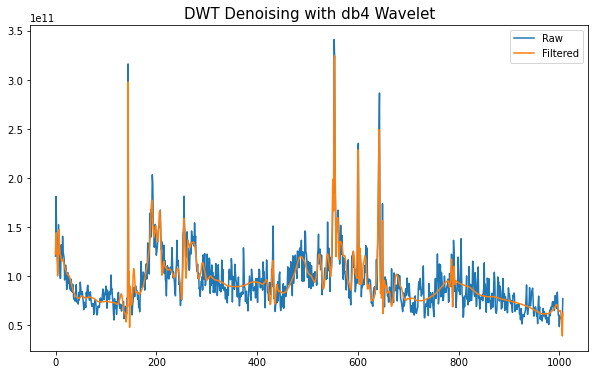

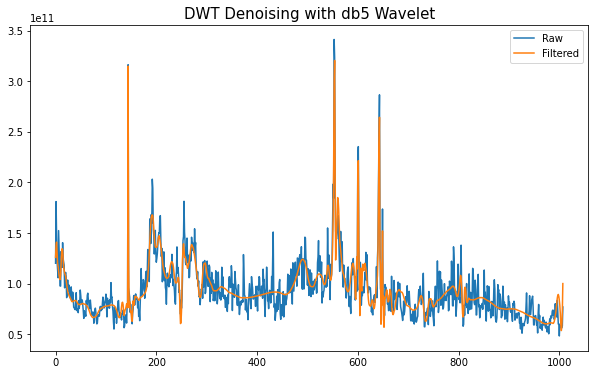

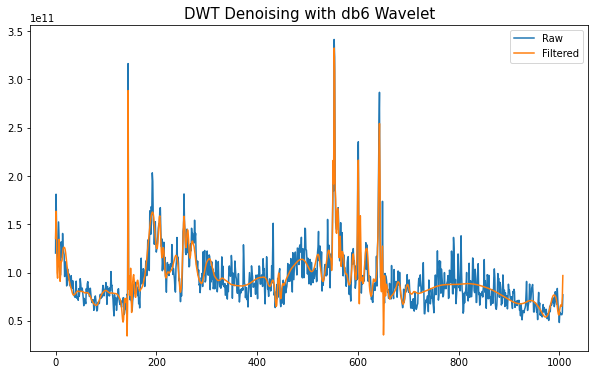

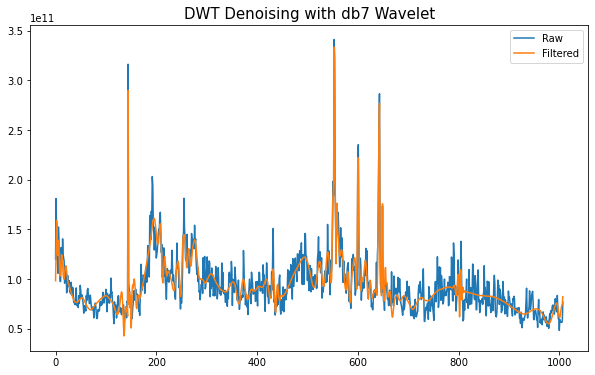

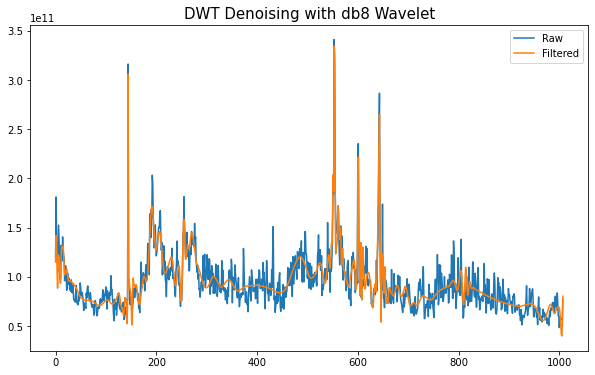

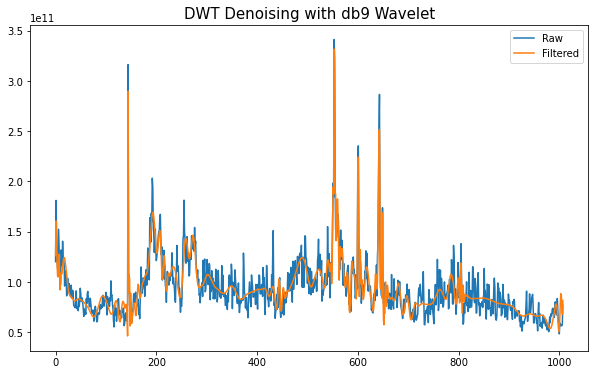

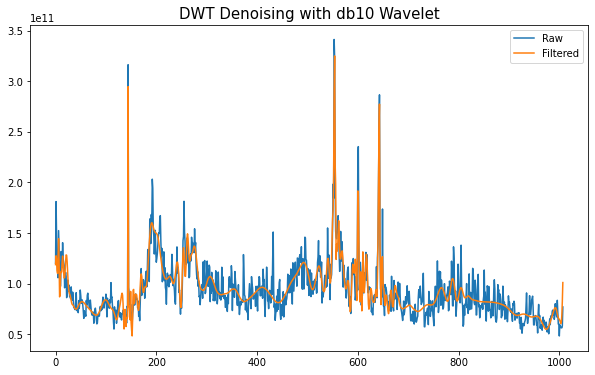

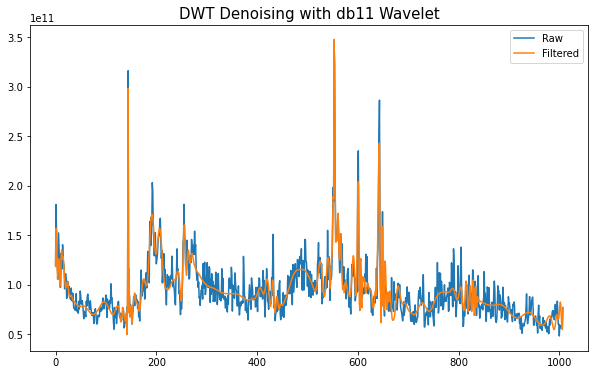

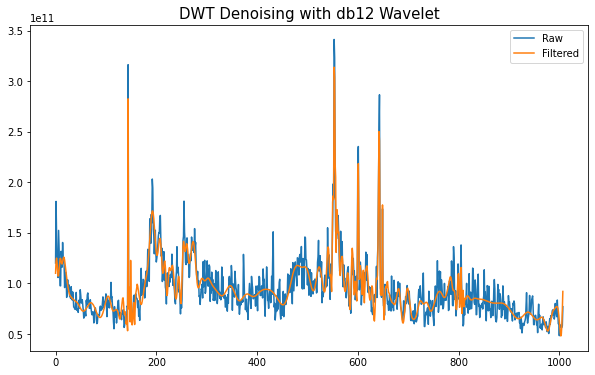

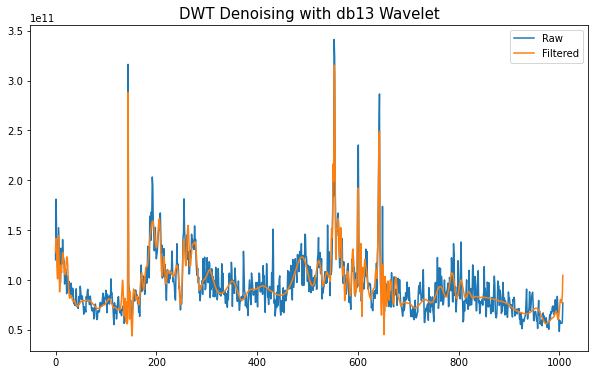

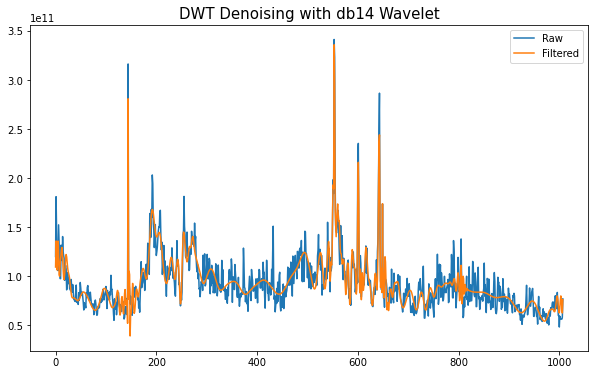

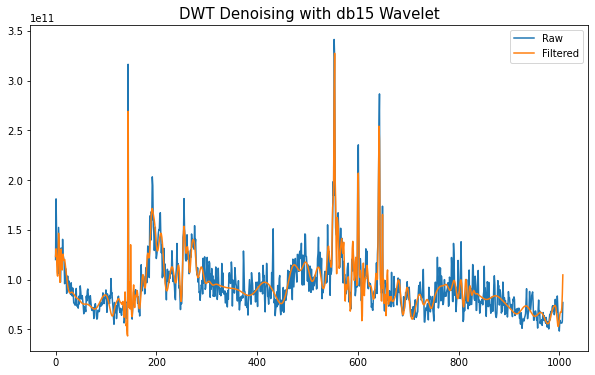

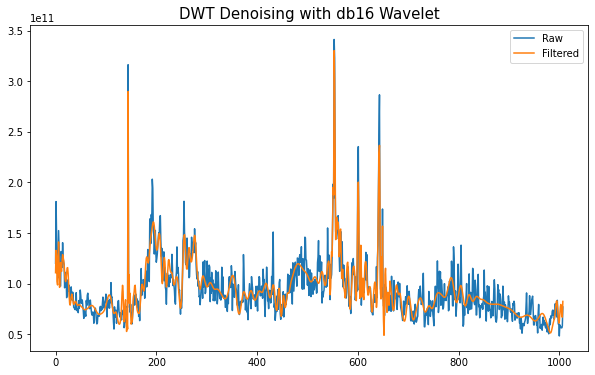

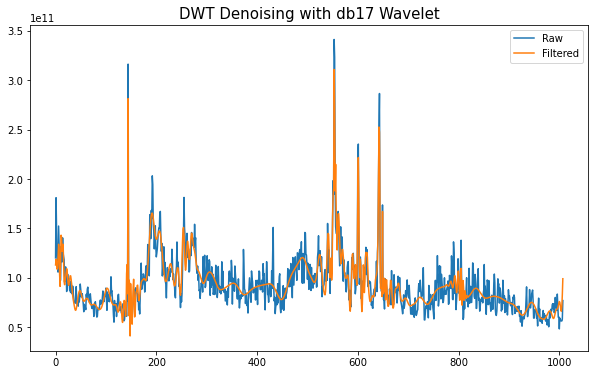

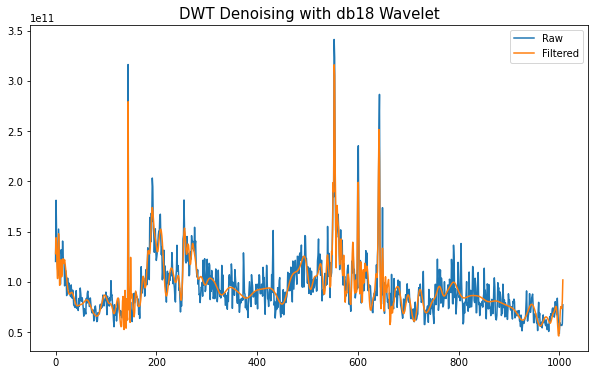

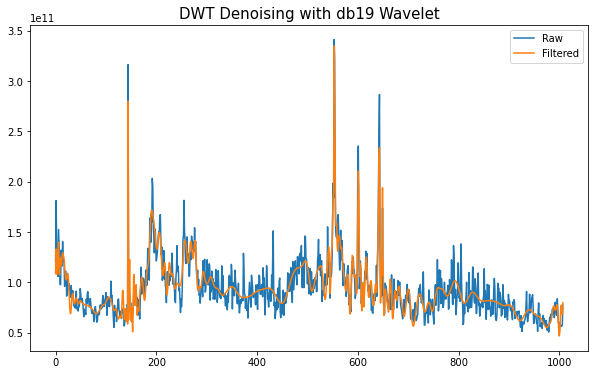

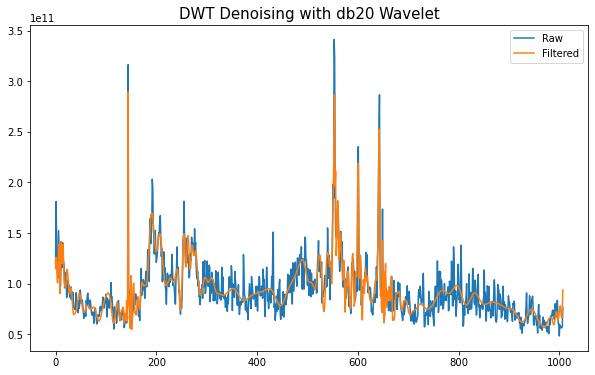

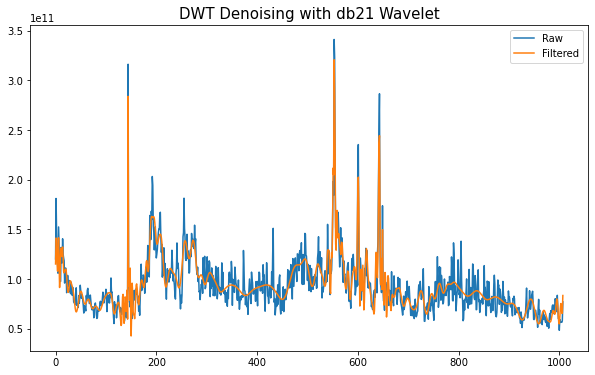

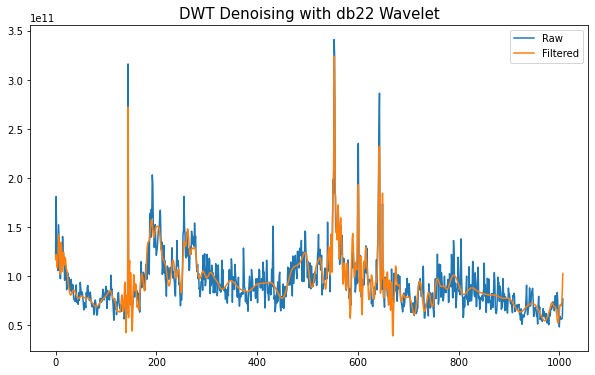

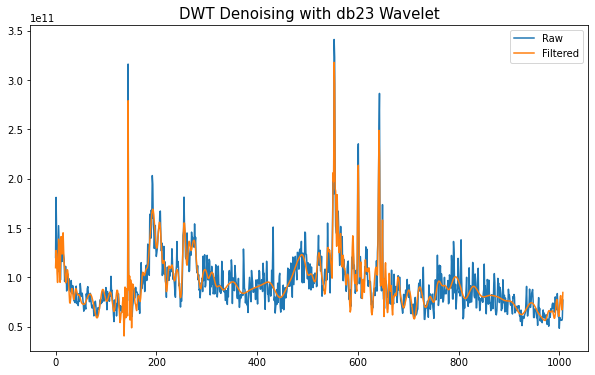

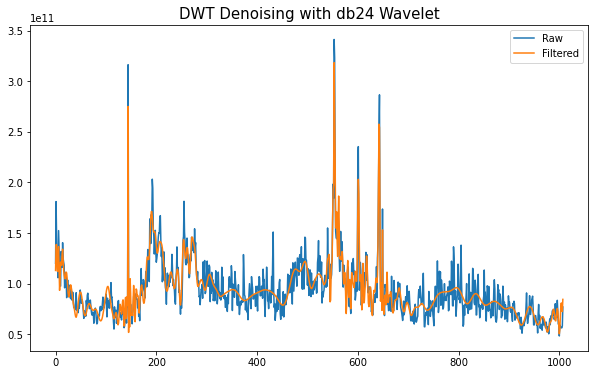

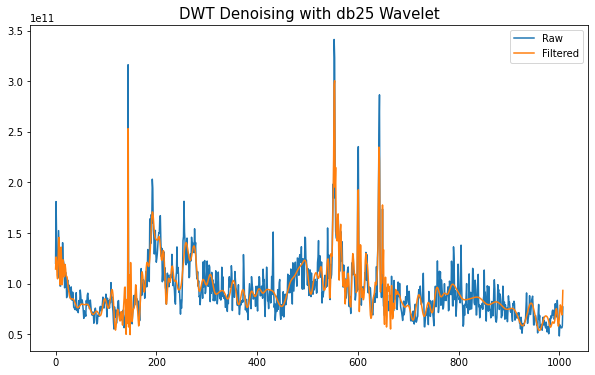

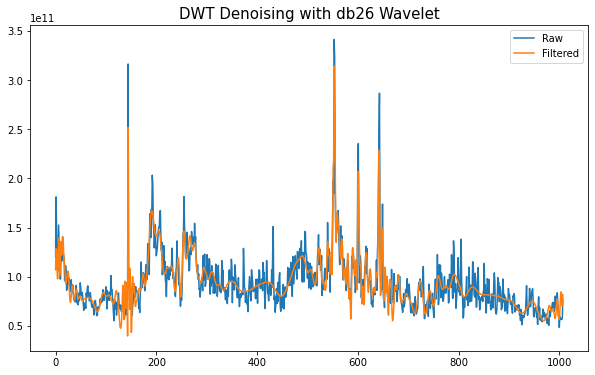

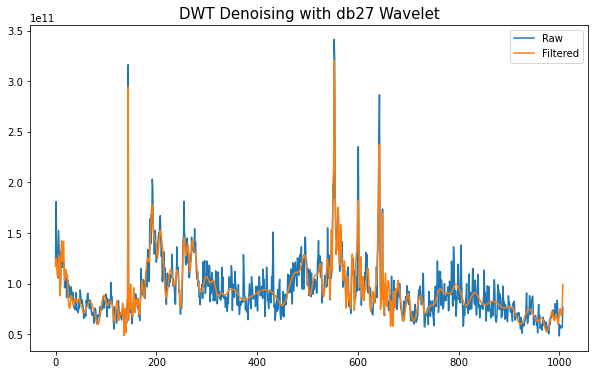

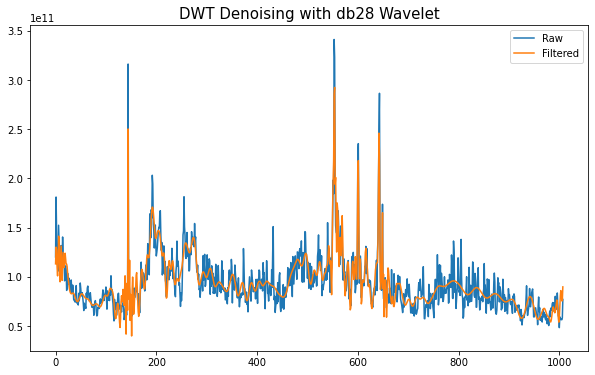

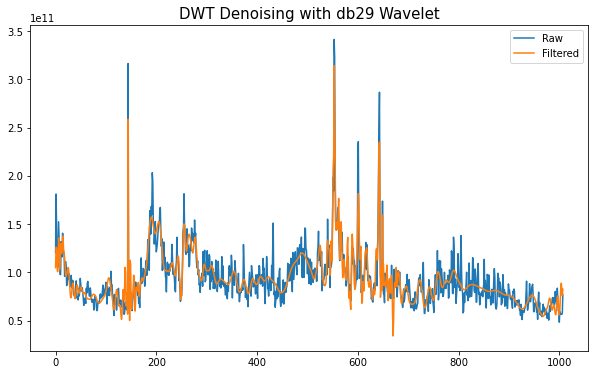

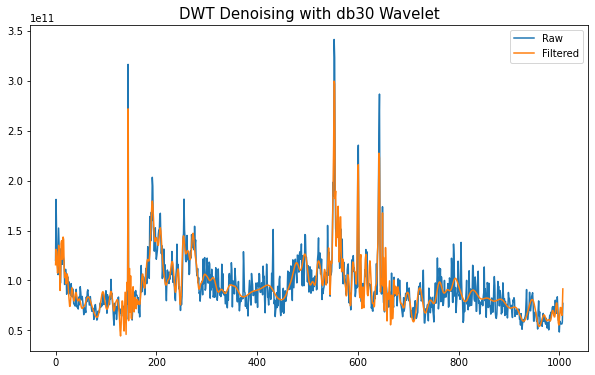

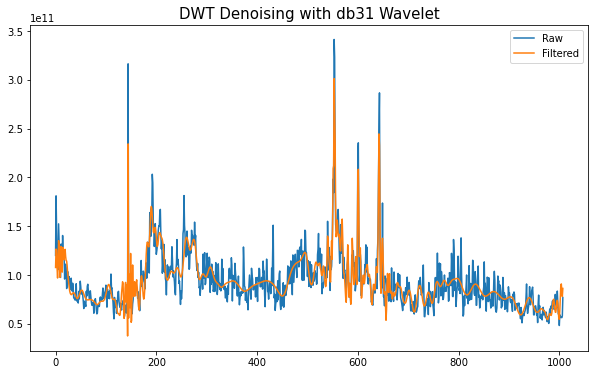

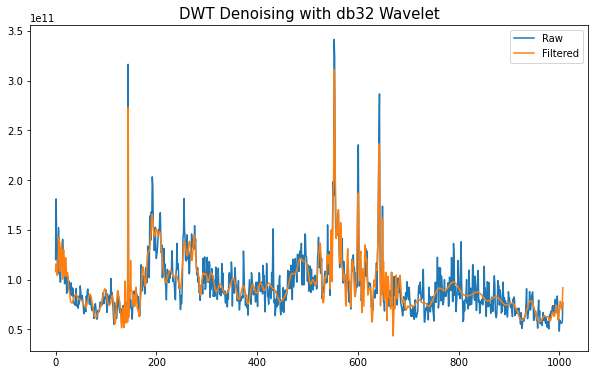

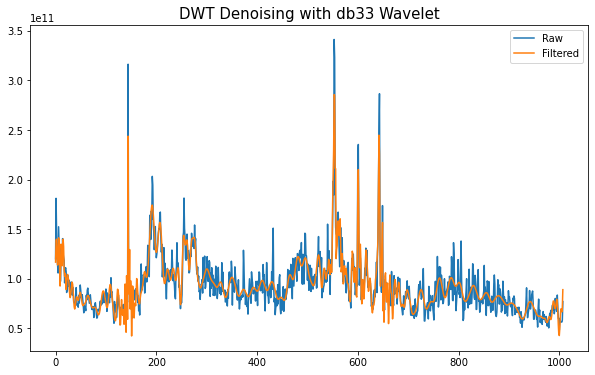

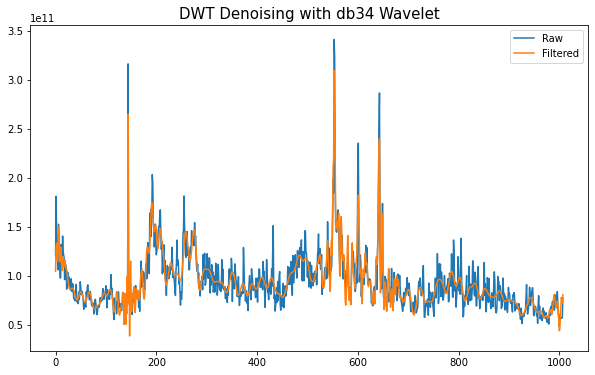

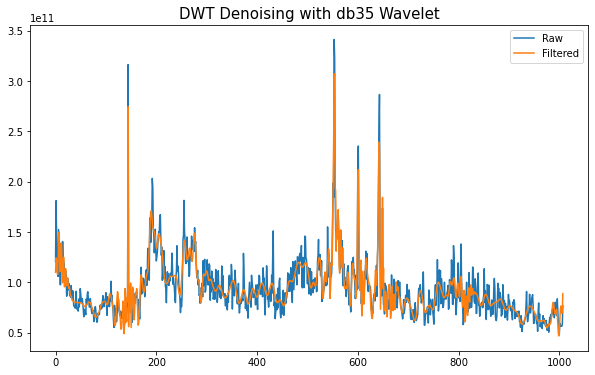

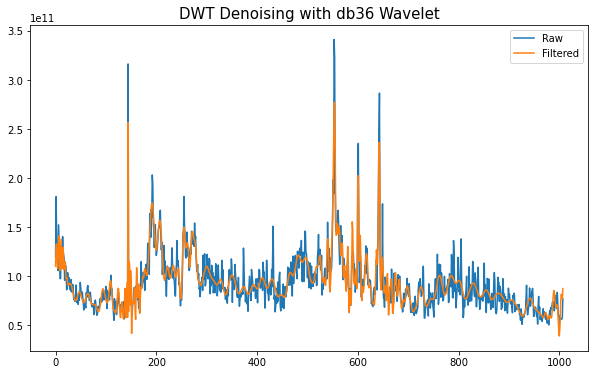

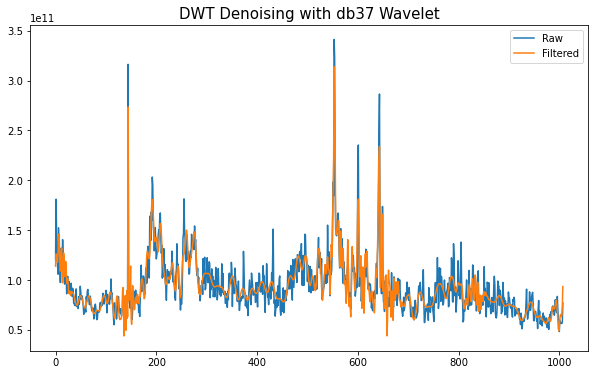

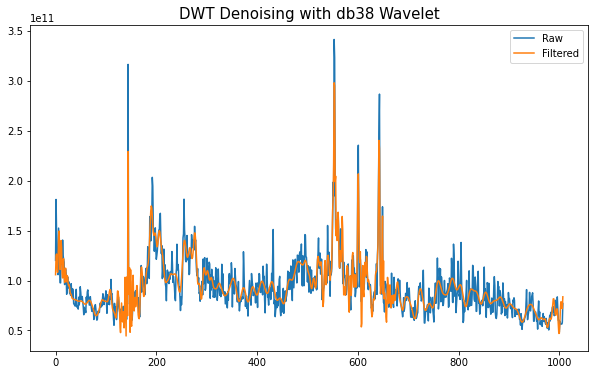

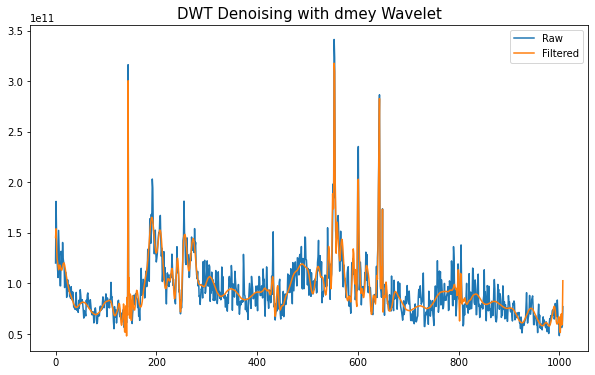

D:\Anaconda\lib\site-packages\pywt\_utils.py:23: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


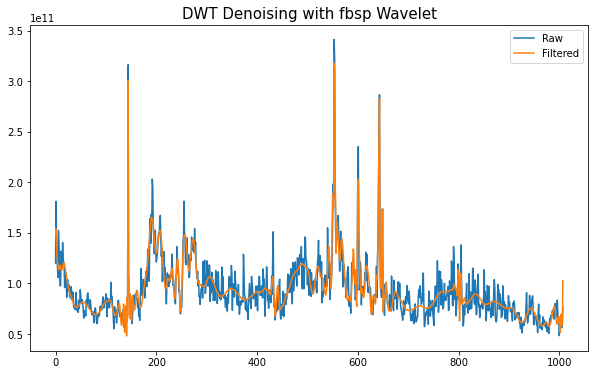

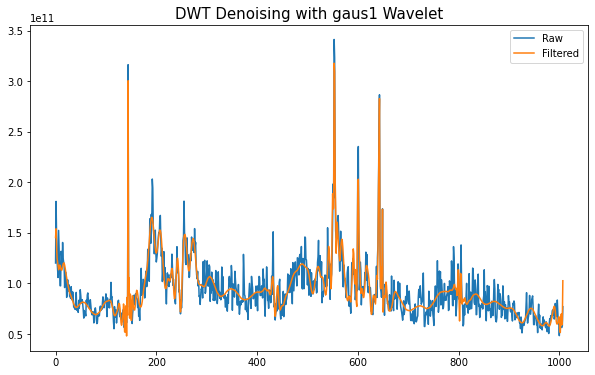

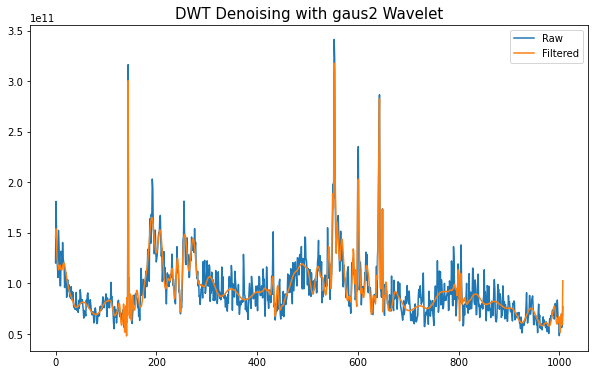

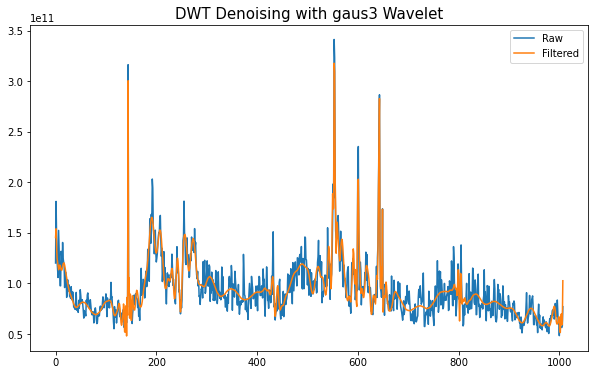

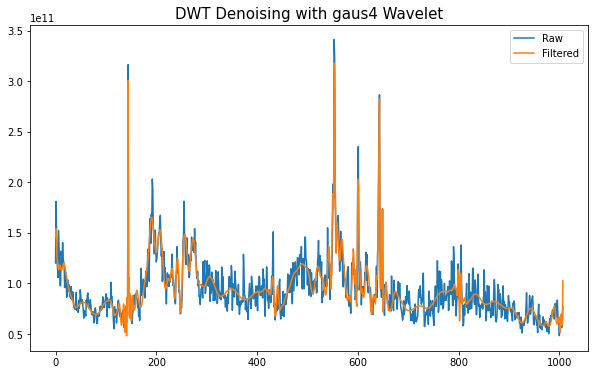

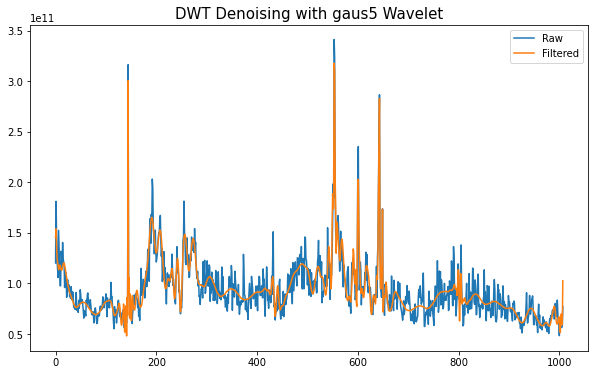

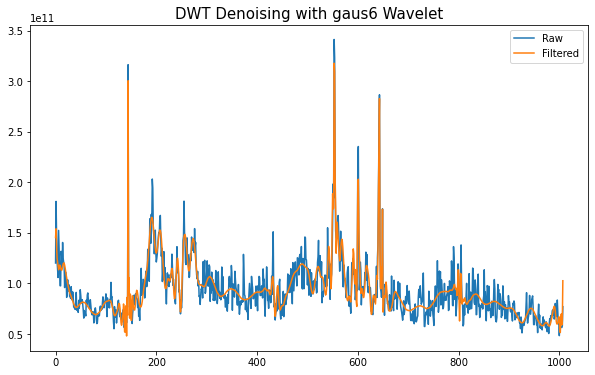

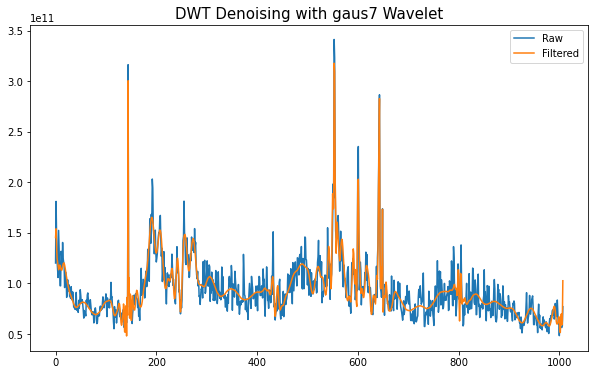

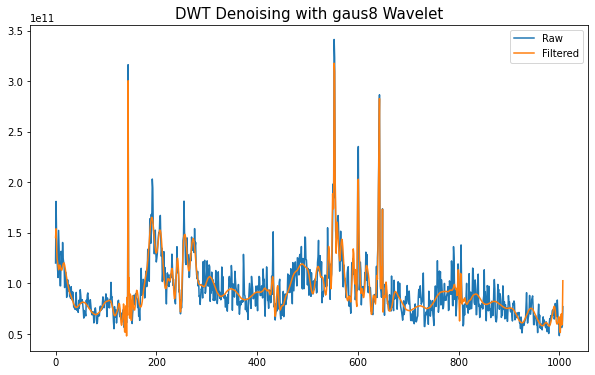

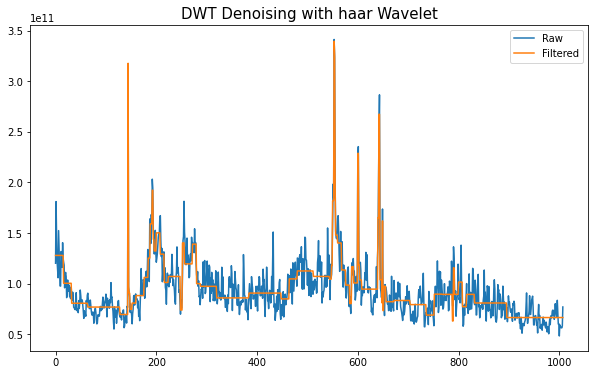

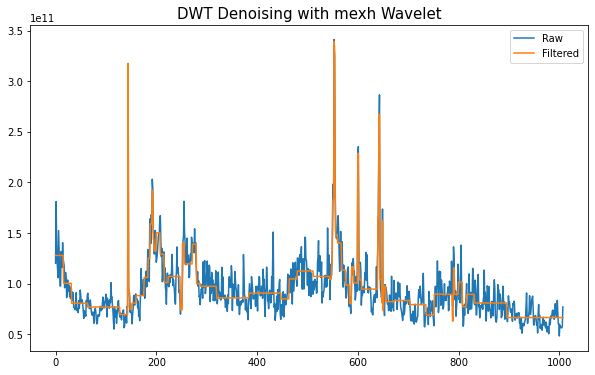

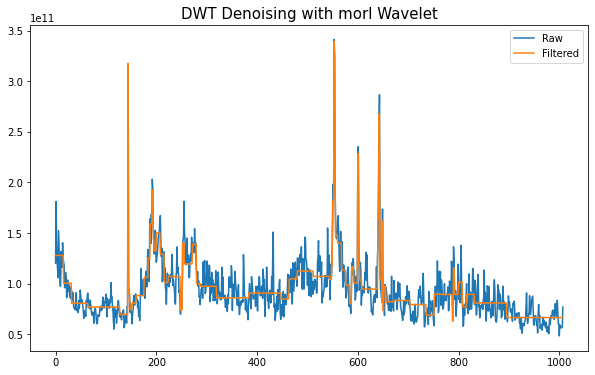

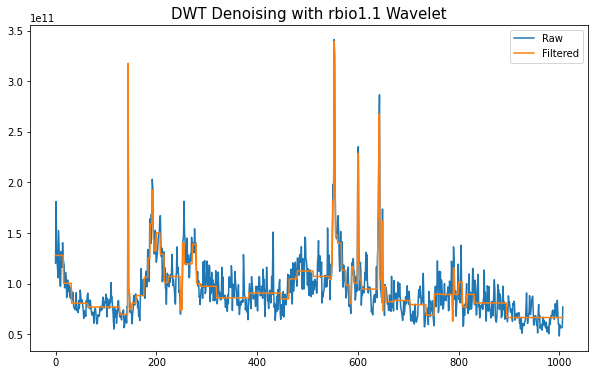

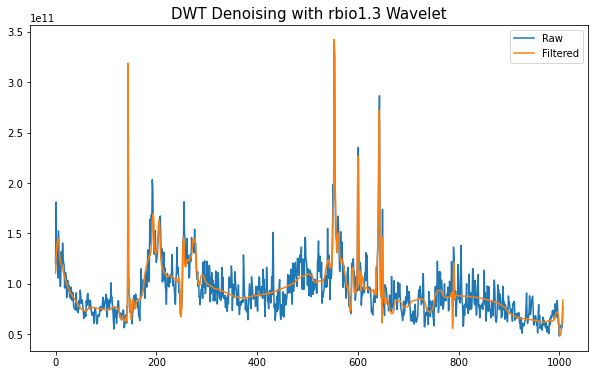

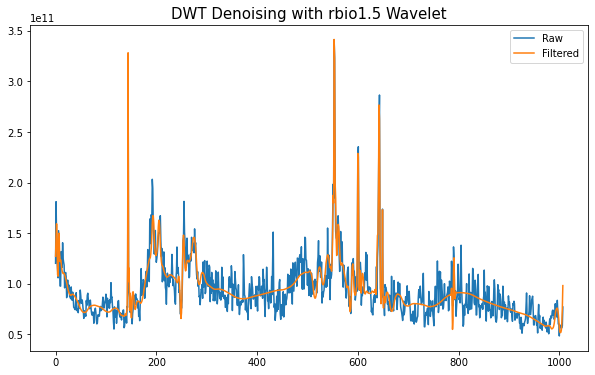

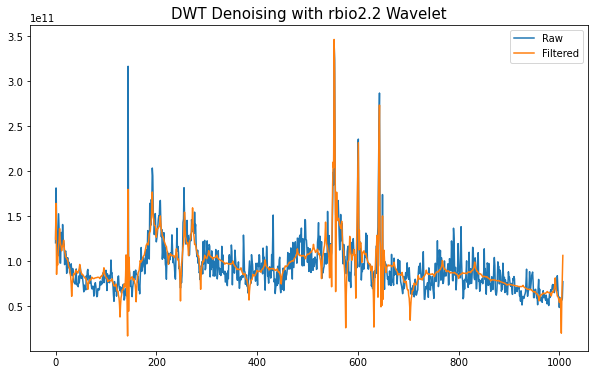

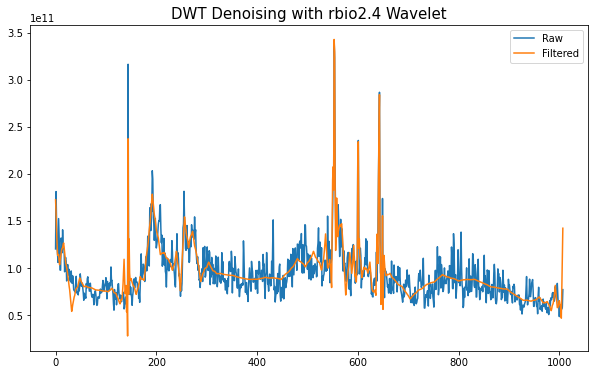

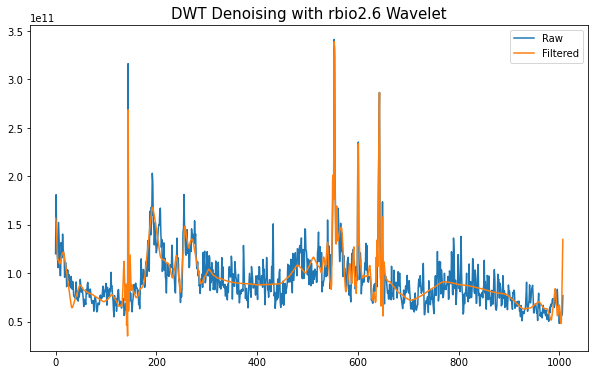

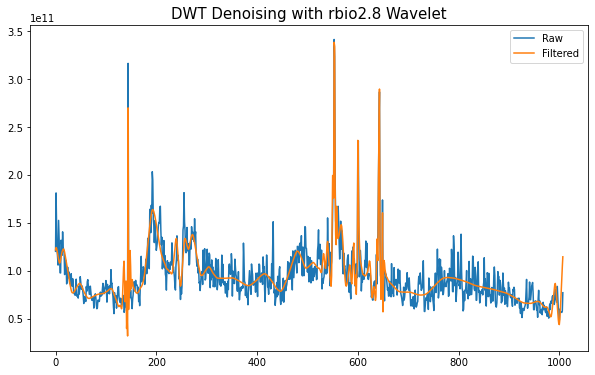

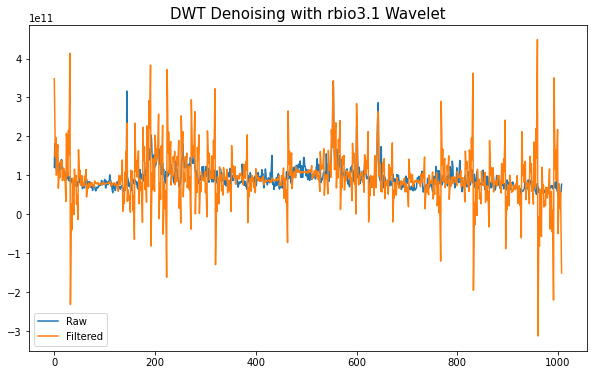

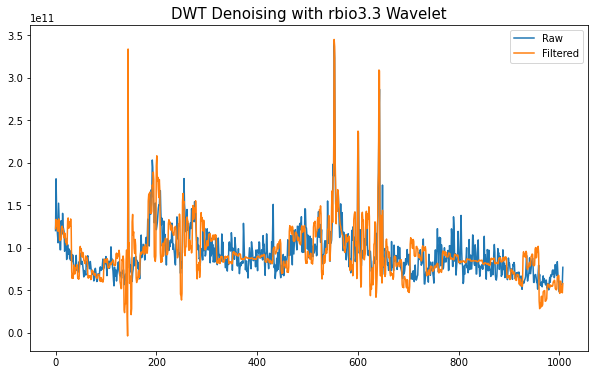

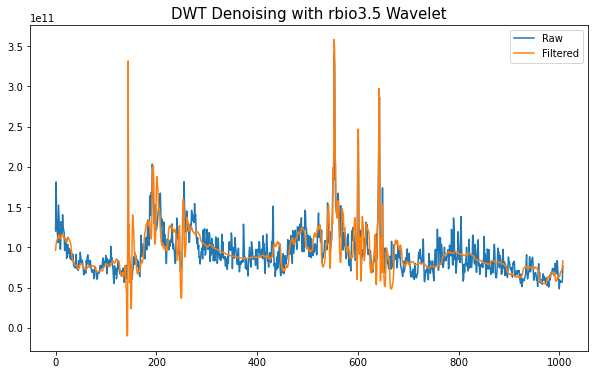

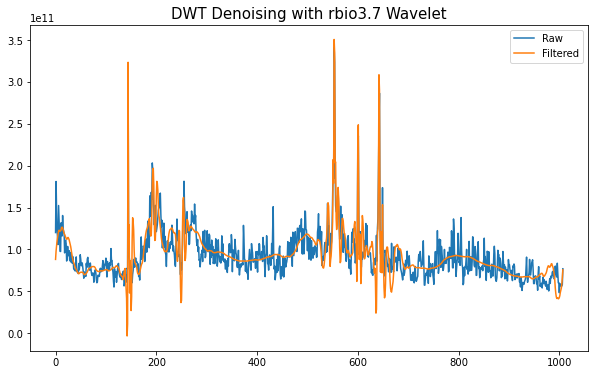

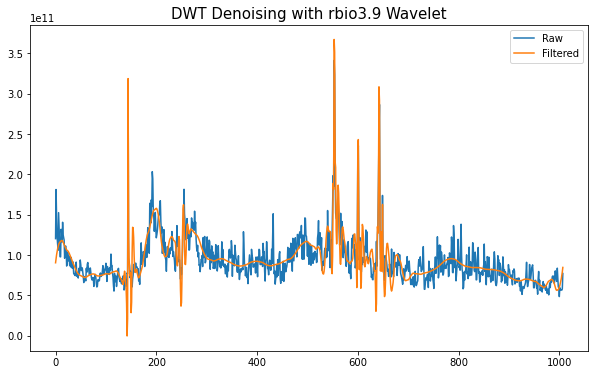

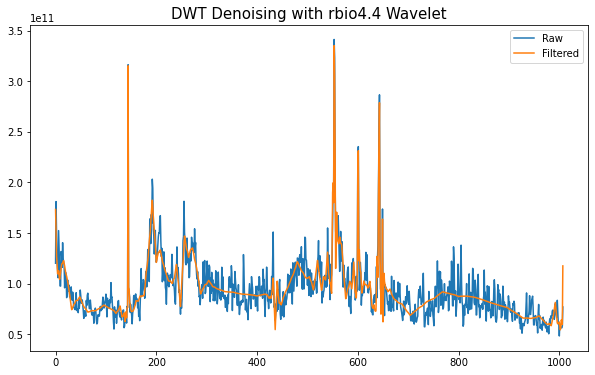

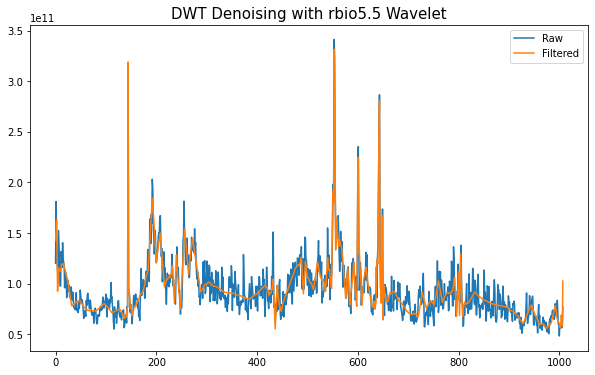

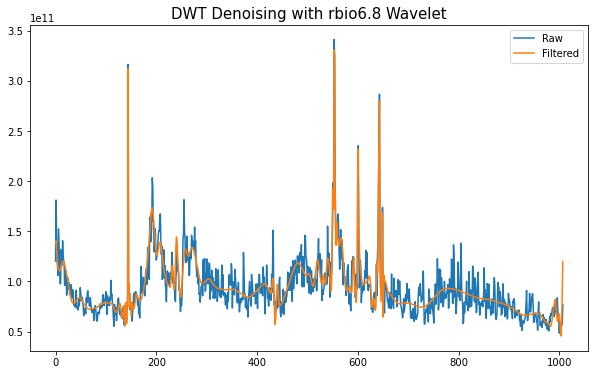

D:\Anaconda\lib\site-packages\pywt\_utils.py:23: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


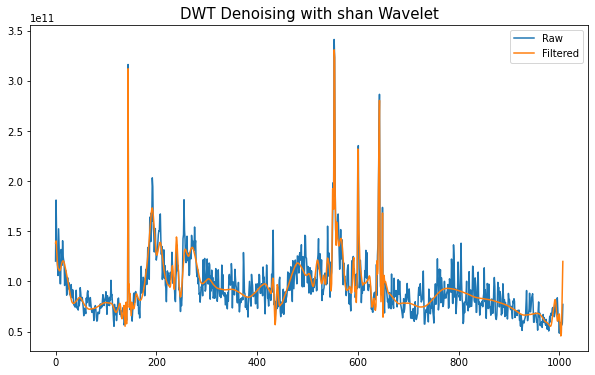

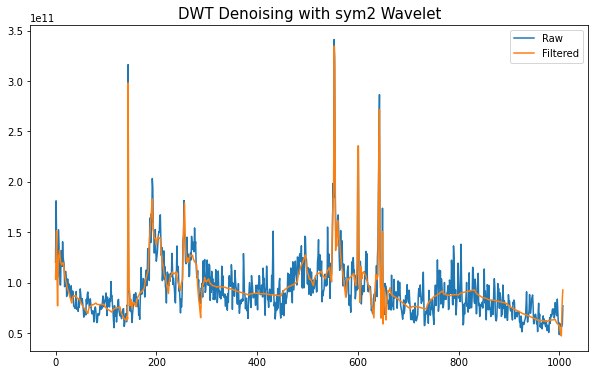

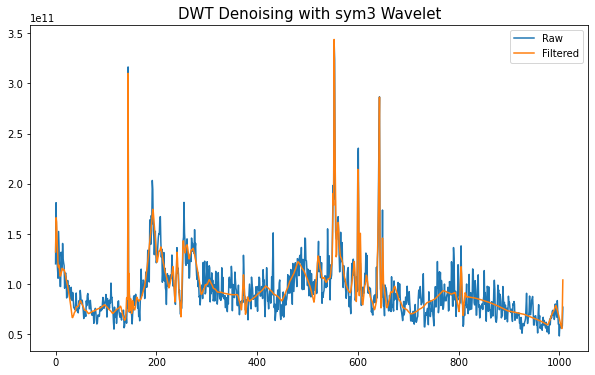

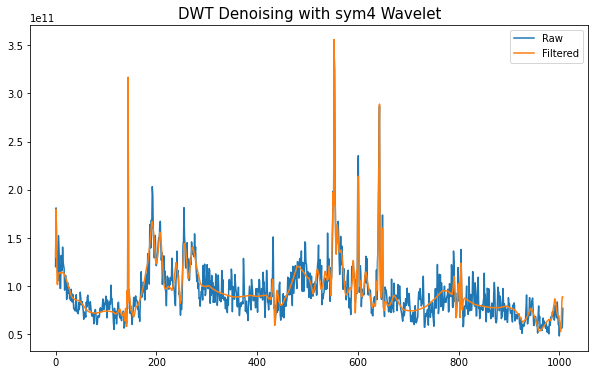

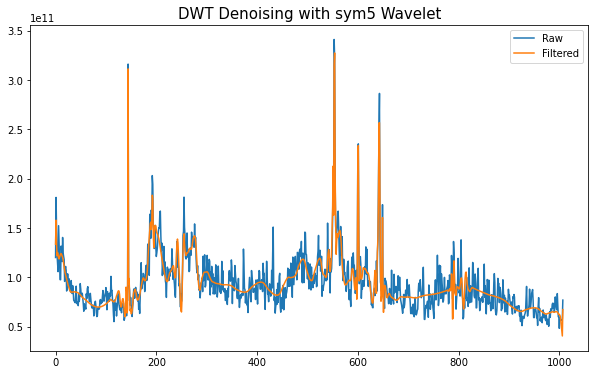

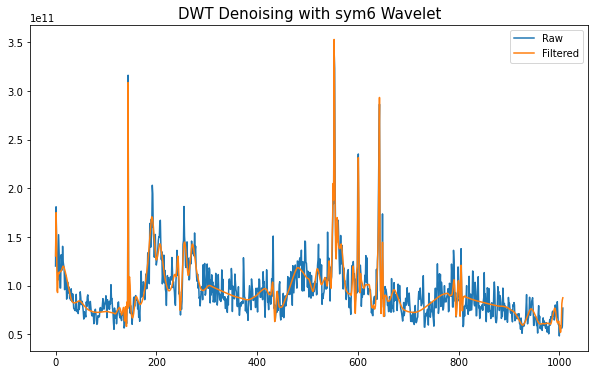

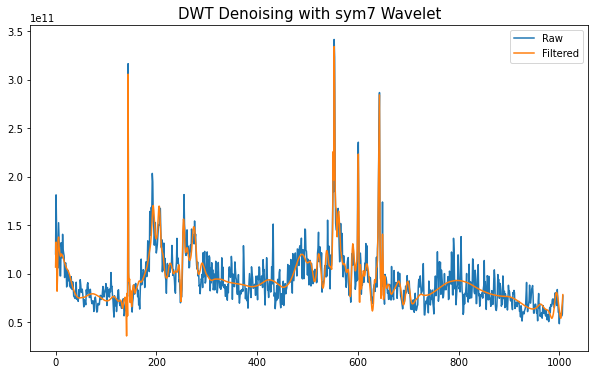

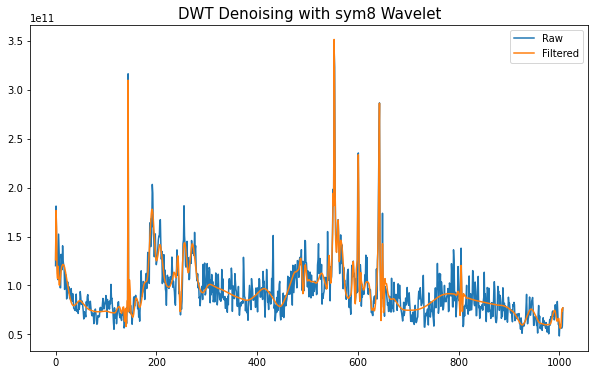

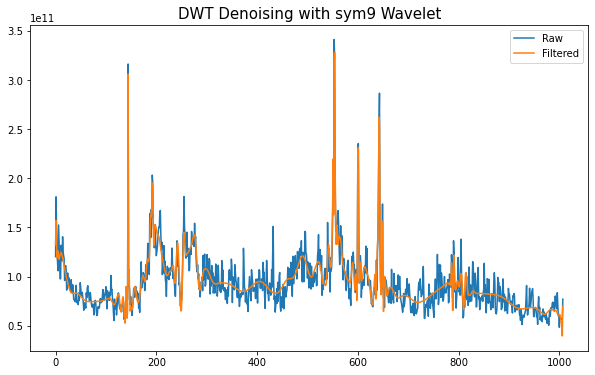

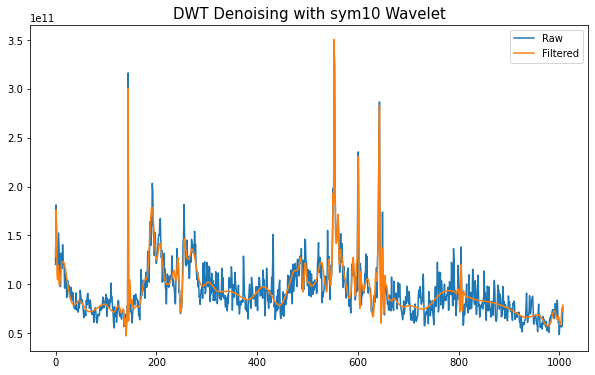

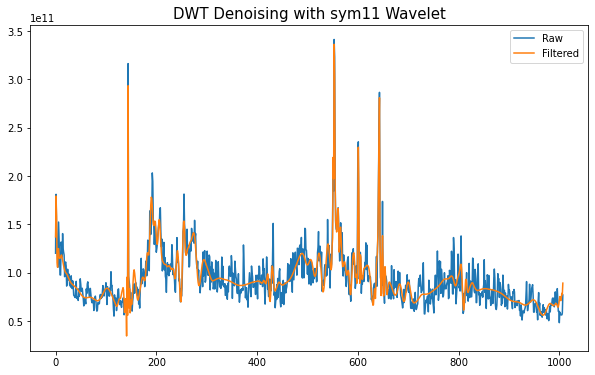

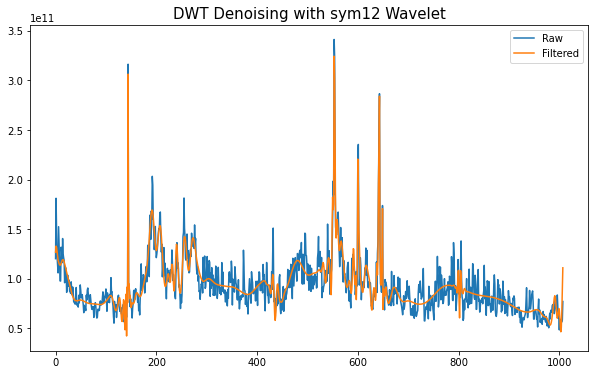

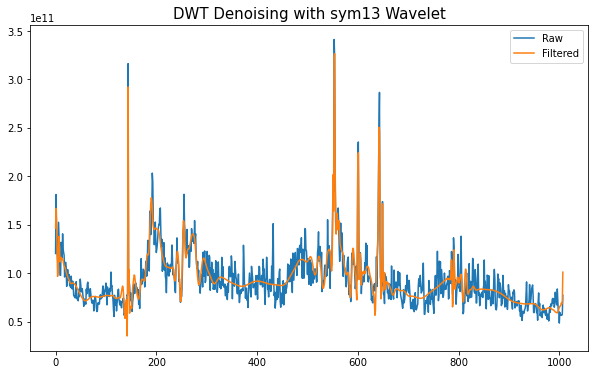

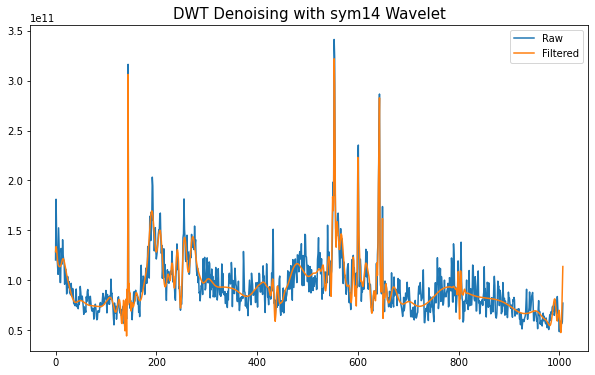

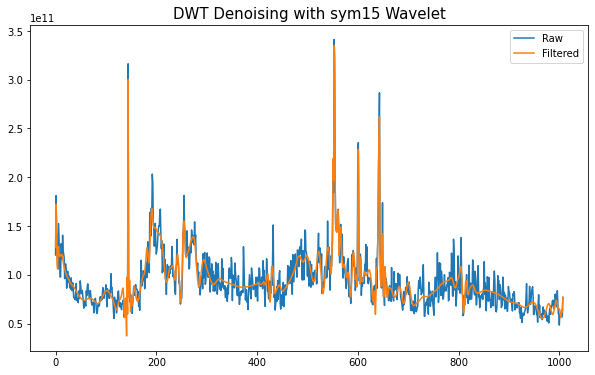

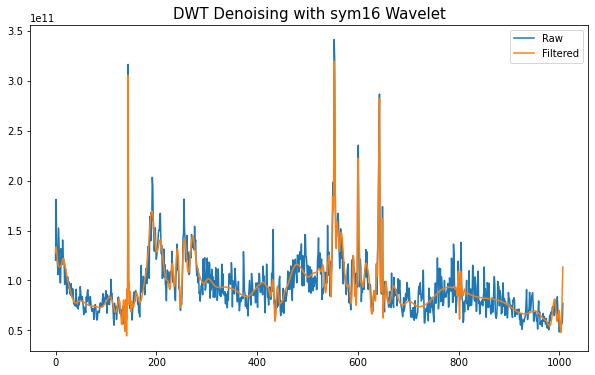

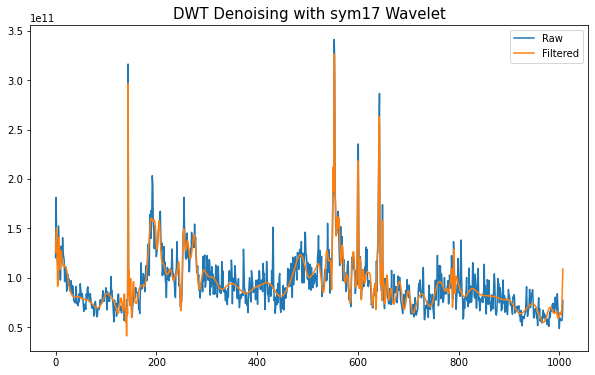

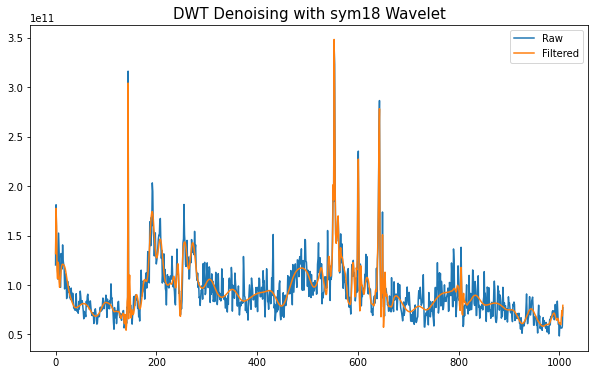

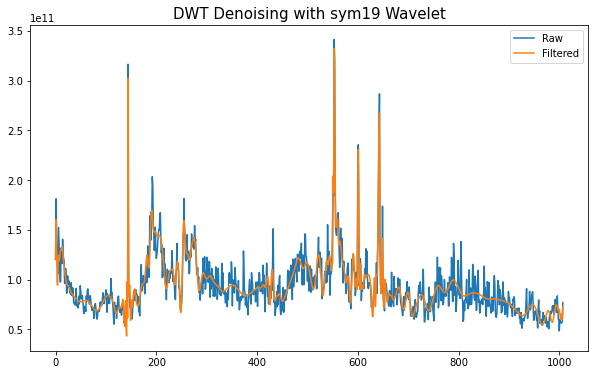

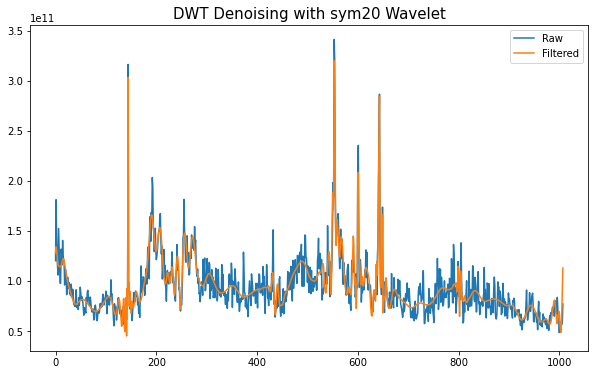

In [11]:
for wav in pywt.wavelist():
    try:
        filtered = wavelet_denoising(signal, wavelet=wav, level=1)
    except:
        pass
    
    plt.figure(figsize=(10, 6))
    plt.plot(signal, label='Raw')
    plt.plot(filtered, label='Filtered')
    plt.legend()
    plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
    plt.show()